<h2>Fake News Classifier</h2>

In [1]:
#importing useful libraries
import math
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline 
%matplotlib inline
print("Ready,set,go....")

Ready,set,go....


<h2>Exploring Datasets</h2>

In [4]:
#loading data sets
df = pd.read_csv('/content/kaggle_fake_train.csv')

In [5]:
#checking head
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
#describing the data
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [8]:
# Finding any NaN values
df.isna().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [9]:
#deleting id column
df.drop('id',axis=1,inplace=True)

In [10]:
#checking head
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


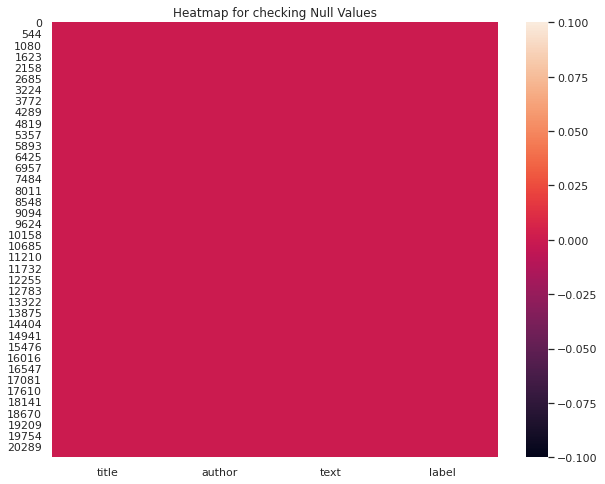

In [12]:
#visuvalising the  null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.title('Heatmap for checking Null Values')
plt.show()

<h2>visualization</h2>

<Figure size 576x432 with 0 Axes>

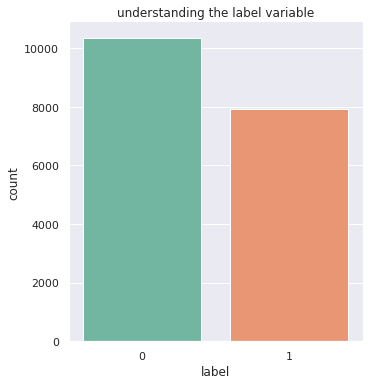

In [16]:
plt.figure(figsize=(8,6))
sns.catplot(x = 'label',data=df,kind = 'count',palette='Set2' )
plt.title("understanding the label variable")
plt.show()

<h2> Data Preprocessing</h2>

In [17]:
#importing libraries
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df2 = df.copy()
df2.reset_index(inplace=True)

In [20]:
# Cleaning the text using stopwords and re
corpus = []
ps = PorterStemmer()

for i in range(0,df2.shape[0]):

  # Cleaning special character
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df2.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus 
  corpus.append(title)

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [23]:
print(X[0][:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
y = df2['label']

<h2>Model Building</h2>

In [26]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 69)
#printing the shapes of training and testing data
print("X_training set shape{},X_testing set shape{}".format(X_train.shape,X_test.shape))
print("y_training set shape{},y_testing set shape{}".format(y_train.shape,y_test.shape))

X_training set shape(12190, 5000),X_testing set shape(6095, 5000)
y_training set shape(12190,),y_testing set shape(6095,)


<h2>Logistic Regression</h2>

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix
print(confusion_matrix(y_test, pred))
accuracy_score(y_test, pred)
print(classification_report(y_test,pred))


[[3147  329]
 [ 101 2518]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3476
           1       0.88      0.96      0.92      2619

    accuracy                           0.93      6095
   macro avg       0.93      0.93      0.93      6095
weighted avg       0.93      0.93      0.93      6095



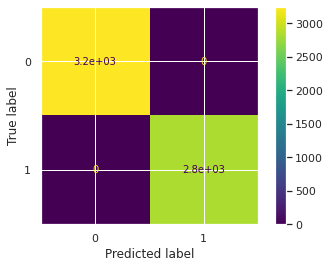

In [31]:
plot_confusion_matrix(lr,X_test,pred)

In [33]:
mat = confusion_matrix(y_test, pred)

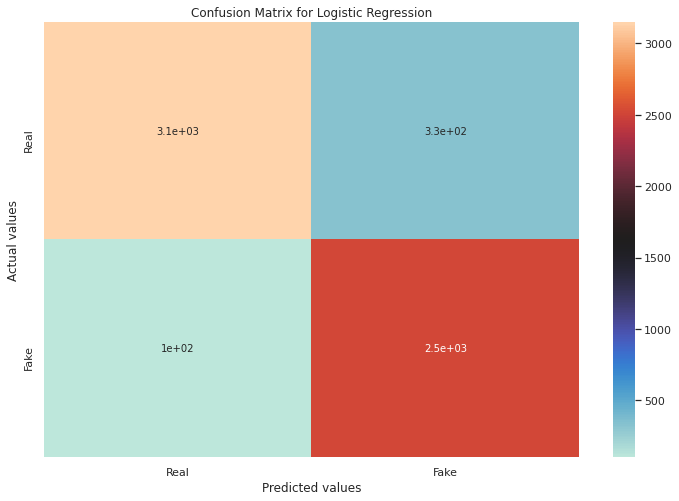

In [37]:
# Plotting the confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [43]:
#hyper tuning for logistic regression
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(LogisticRegression(),{'C':np.arange(0.1,1.1,0.1)},cv=10)

In [44]:
gd.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
gd.best_params_

{'C': 1.0}

<h2>Multinomial Naive Bayes</h2>

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
# Predicting the Test set results
pred2 = nb.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix
print(confusion_matrix(y_test, pred2))
accuracy_score(y_test, pred2)
print(classification_report(y_test,pred2))

[[3110  366]
 [ 253 2366]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      3476
           1       0.87      0.90      0.88      2619

    accuracy                           0.90      6095
   macro avg       0.90      0.90      0.90      6095
weighted avg       0.90      0.90      0.90      6095



In [50]:
mat = confusion_matrix(y_test, pred2)

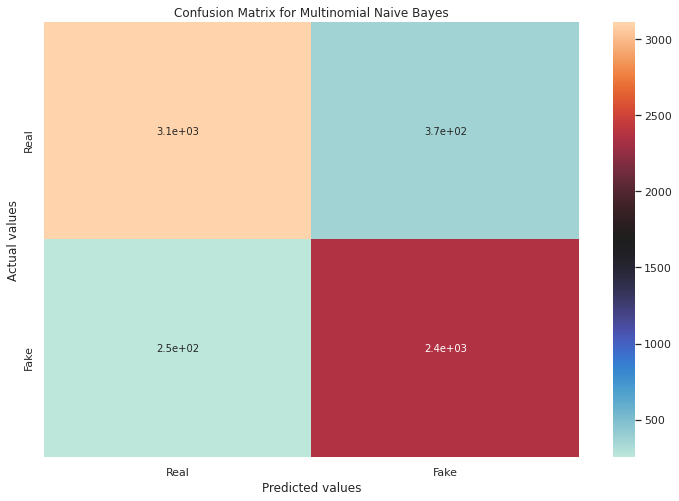

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

In [52]:
#hypertuning 
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(MultinomialNB(),{'alpha':np.arange(0.1,1.1,0.1)},cv=10)
gd.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
gd.best_params_

{'alpha': 0.5}

In [54]:
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

<h2>Xgboost</h2>

In [55]:
from xgboost import XGBClassifier
xc = XGBClassifier()

In [56]:
xc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
pred3 = xc.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix
print(confusion_matrix(y_test, pred3))
accuracy_score(y_test, pred3)
print(classification_report(y_test,pred3))

[[2916  560]
 [   8 2611]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3476
           1       0.82      1.00      0.90      2619

    accuracy                           0.91      6095
   macro avg       0.91      0.92      0.91      6095
weighted avg       0.92      0.91      0.91      6095



In [59]:
mat = confusion_matrix(y_test, pred3)

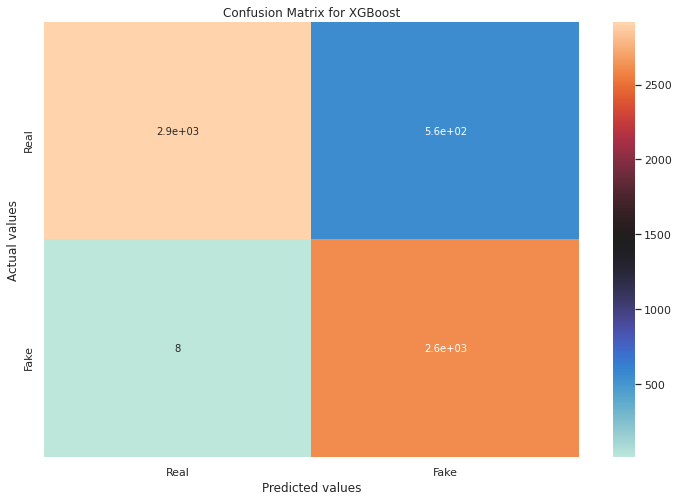

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for XGBoost')
plt.show()

<h2>predicitions</h2>

In [63]:
#creating a method for finding wether news is fake or real
#using logistic regrssion because of best accuracy
def fake_news(var):
  var = re.sub(pattern='[^a-zA-Z]',repl=' ', string=var)
  var = var.lower()
  sample_news_words = var.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr.predict(temp)

In [64]:
df_test = pd.read_csv("/content/kaggle_fake_test.csv")

In [65]:
df_test.drop('id',axis=1,inplace = True)

In [66]:
#predicting news
var = df['title'][69]
if fake_news(var):
  print("This May be Fake News!!")
else:
  print("This may be real News")

This May be Fake News!!


In [68]:
#predicting news
var = df['title'][7]
if fake_news(var):
  print("This May be Fake News!!")
else:
  print("This may be real News")

This may be real News
